In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [42]:
q_m = pd.read_csv("../data_processed/questionaire_compilation.csv")
q_m.set_index("id",inplace=True)

In [43]:
(q_m.isna().sum() / q_m.shape[0]) * 100

Agoraphobia_cognition              35.820896
Alcoholism                         40.298507
Biological_rhythm                  43.283582
Childhood_Trauma                   58.208955
Depression                         26.865672
Drug_attitude                      58.208955
Dysphoria                          53.731343
Fear_of_negative_evaluation        46.268657
Generalized_Anxiety_disorder       17.910448
Internet_habit                     40.298507
Job_stre                           38.805970
Mood_disorder                      31.343284
Morning_Evening_person             40.298507
Nicotine_addiction                 62.686567
Panic_Fear                         23.880597
Physical_Activity                   2.985075
Physical_sensation                 37.313433
Quality_of_life                    53.731343
Resilience                         35.820896
Screening_for_depression           11.940299
Smart_phone_habit                  37.313433
Social_avoidance_and_discomfort    44.776119
Spirituali

In [46]:
q_m.dropna(thresh=q_m.shape[0] * 0.5, axis=1, inplace=True)

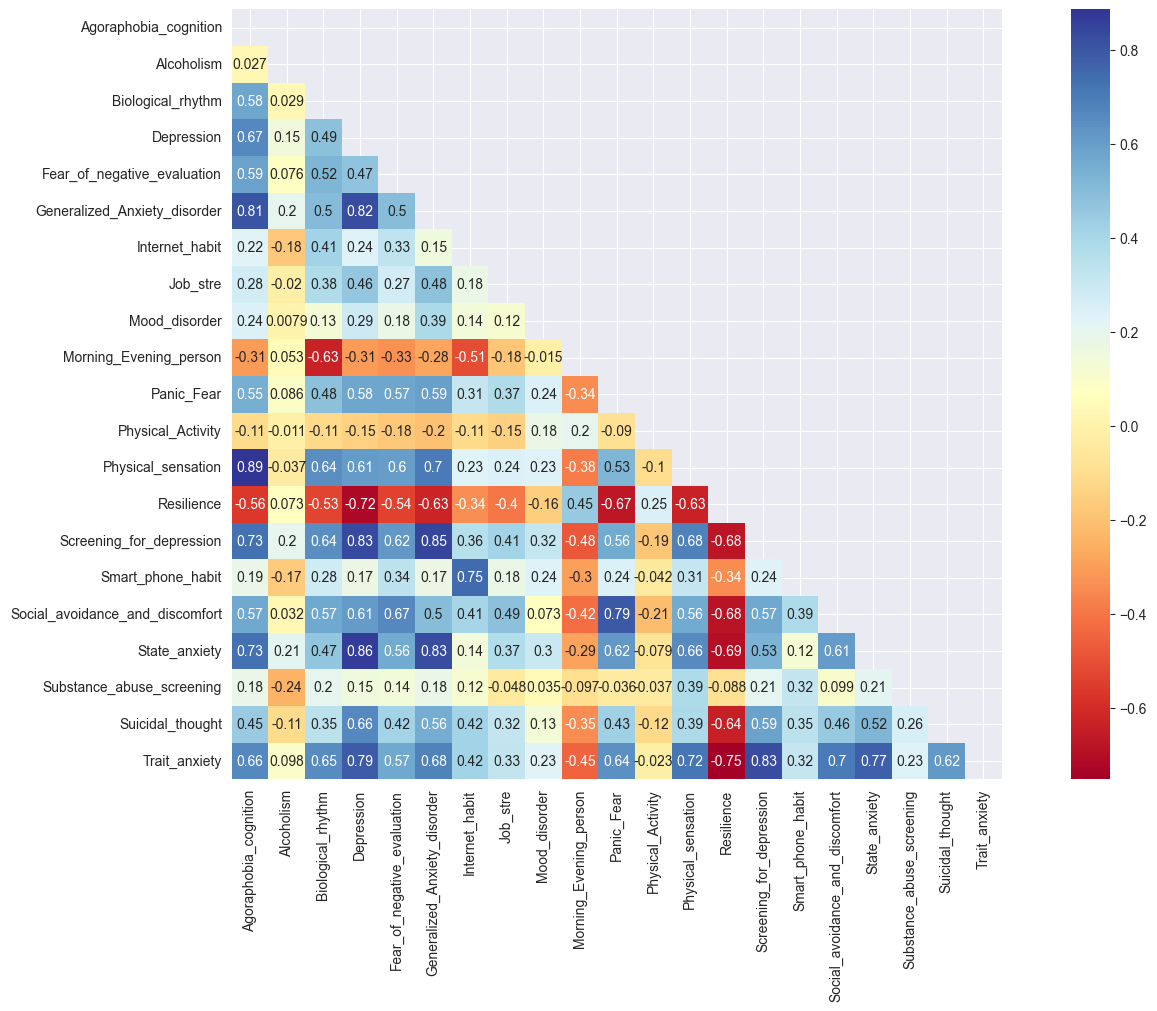

In [47]:
fig = plt.figure(figsize=(18, 10))
mask = np.triu(np.ones_like(q_m.corr(), dtype=bool))
p = sns.heatmap(q_m.corr(), mask=mask, square=True, annot=True, cmap='RdYlBu')

In [48]:
columns = q_m.columns
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = pd.DataFrame(imputer.fit_transform(q_m), index=q_m.index)
imputed_data.columns = columns

In [49]:
imputed_data.isna().sum()

Agoraphobia_cognition              0
Alcoholism                         0
Biological_rhythm                  0
Depression                         0
Fear_of_negative_evaluation        0
Generalized_Anxiety_disorder       0
Internet_habit                     0
Job_stre                           0
Mood_disorder                      0
Morning_Evening_person             0
Panic_Fear                         0
Physical_Activity                  0
Physical_sensation                 0
Resilience                         0
Screening_for_depression           0
Smart_phone_habit                  0
Social_avoidance_and_discomfort    0
State_anxiety                      0
Substance_abuse_screening          0
Suicidal_thought                   0
Trait_anxiety                      0
dtype: int64

In [54]:
panic = pd.read_csv("../data_processed/panic.csv")
panic.drop(columns="Date", inplace=True)

In [55]:
panic_question = pd.merge(imputed_data, panic, on="id")
panic_question.drop(columns="id", inplace=True)

In [58]:
X = panic_question.drop(columns="panic")
y = panic_question["panic"]

scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=1)

In [64]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(roc_auc_score(y_train, pred_train))
print(roc_auc_score(y_test, pred_test))
pd.DataFrame(model.feature_importances_, index=X.columns)

0.5353718668675523
0.36074561403508776


,0
Agoraphobia_cognition,0.052824
Alcoholism,0.044503
Biological_rhythm,0.040926
Depression,0.063835
Fear_of_negative_evaluation,0.043806
Generalized_Anxiety_disorder,0.043783
Internet_habit,0.060304
Job_stre,0.034985
Mood_disorder,0.040791
Morning_Evening_person,0.040018


In [67]:
X = panic_question.drop(columns="panic")
y = panic_question["panic"]

scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X))

X_s = X_s.iloc[:, :7]

X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(roc_auc_score(y_train, pred_train))
print(roc_auc_score(y_test, pred_test))

0.5016207825412045
0.4930555555555556


In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.4762429378531074
Test Accuracy: 0.4864864864864865
